In [12]:
import numpy as np
import pandas as pd
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('/home/mali/RecommendationEngine/data/external/ml-100k/u.data',sep = '\t',names = column_names)

In [13]:
movie_titles = pd.read_csv('https://raw.githubusercontent.com/Shashank545/Recommendation-System-ML-/master/Movie_Id_Titles')

movie_titles.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [14]:
df = pd.merge(df,movie_titles,on='item_id')

df.head(3)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)


In [17]:
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()
print(n_users)
print(n_items)

943
1682


In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [19]:
print(train_data.shape)
print(test_data.shape)

(75000, 5)
(25000, 5)


In [24]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set_style('white')
style.available
style.use('fivethirtyeight')
%matplotlib inline

In [28]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [30]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [42]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(3)

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


<AxesSubplot:>

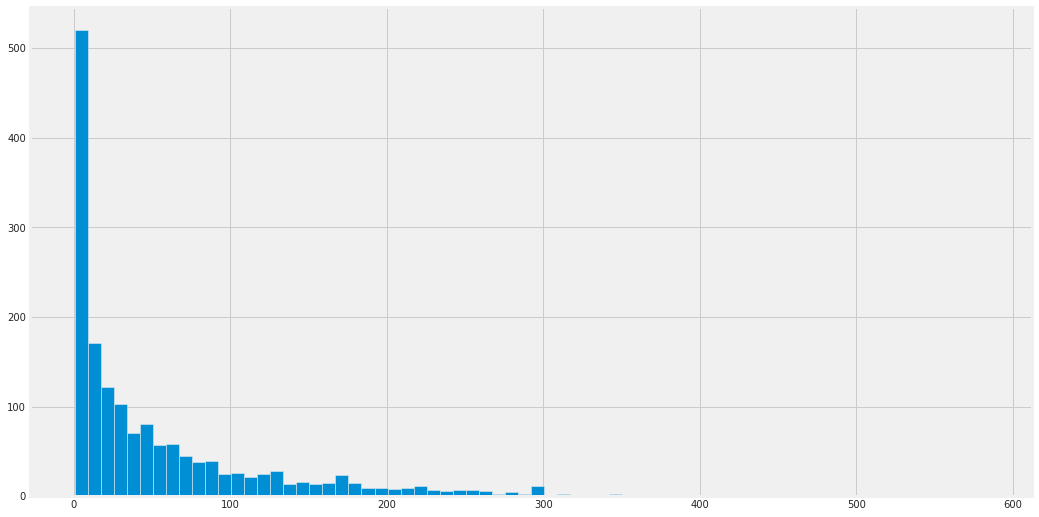

In [47]:
plt.figure(figsize=(16,9))
ratings['num_of_ratings'].hist(bins=70)

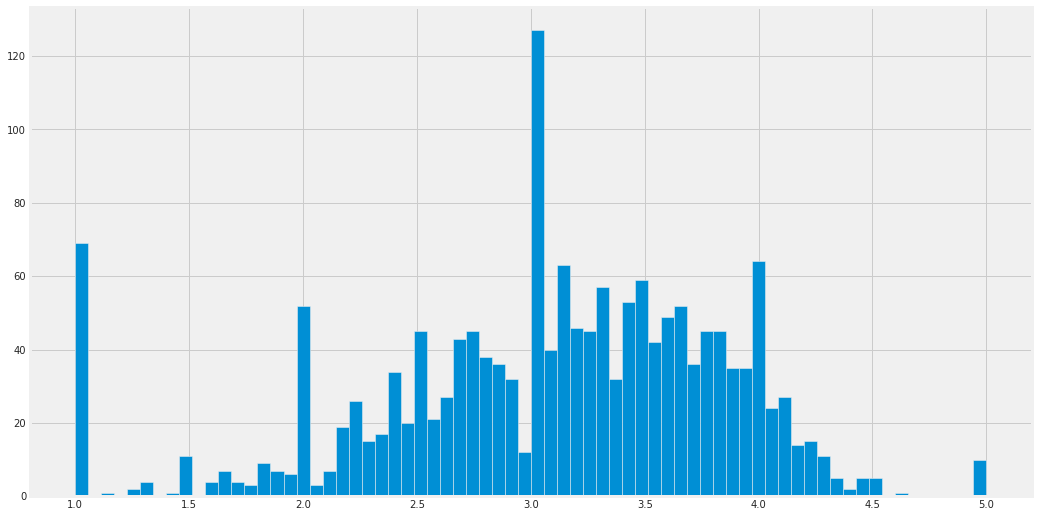

In [55]:
plt.figure(figsize=(16,9))
ratings['rating'].hist(bins=70)
style.use('fivethirtyeight')


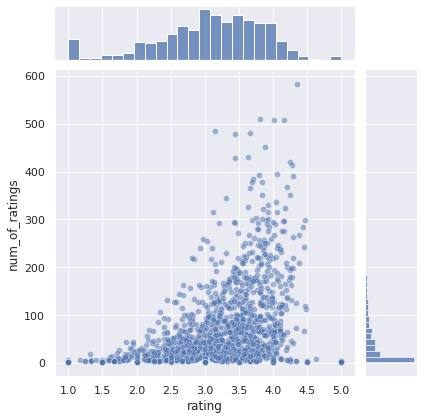

In [63]:

from matplotlib import rcParams
rcParams['figure.figsize'] = 16,9

sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha = .5)

In [65]:
moviemat = df.pivot_table(index='user_id', columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
ratings['num_of_ratings'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: num_of_ratings, dtype: int64

In [73]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [76]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/mali/RecommendationEngine/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mali/RecommendationEngine/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [82]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns= ['Corelation'])
corr_starwars.dropna(inplace = True)
corr_starwars

,Corelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [83]:

corr_starwars['Corelation'].sort_values(ascending=False)

title
Commandments (1997)                       1.0
Cosi (1996)                               1.0
No Escape (1994)                          1.0
Stripes (1981)                            1.0
Man of the Year (1995)                    1.0
                                         ... 
Roseanna's Grave (For Roseanna) (1997)   -1.0
For Ever Mozart (1996)                   -1.0
American Dream (1990)                    -1.0
Frankie Starlight (1995)                 -1.0
Fille seule, La (A Single Girl) (1995)   -1.0
Name: Corelation, Length: 1410, dtype: float64

In [88]:
train_data

,user_id,item_id,rating,timestamp,title
34374,452,153,4,875276361,"Fish Called Wanda, A (1988)"
48031,551,587,4,892783525,"Hour of the Pig, The (1993)"
45369,379,176,5,886317511,Aliens (1986)
60737,549,620,3,881672650,"Chamber, The (1996)"
26206,85,172,4,882813285,"Empire Strikes Back, The (1980)"
...,...,...,...,...,...
14618,916,498,3,880844241,"African Queen, The (1951)"
80570,425,313,1,890346317,Titanic (1997)
561,149,346,4,883512658,Jackie Brown (1997)
83110,94,226,2,891721238,Die Hard 2 (1990)


In [99]:
train_data_matrix = np.zeros((n_users,n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1,line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users,n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1,line[2]-1] = line[3]


In [100]:
train_data_matrix.shape

(943, 1682)

In [101]:
test_data_matrix.shape

(943, 1682)